# Curso Computer Vision

<img src="https://yaelmanuel.com/wp-content/uploads/2021/12/platzi-banner-logo-matematicas.png" width="500px">

---

**Definir el path del video**

In [ ]:
video_path = "./videos/store.mp4"

In [4]:
video_path = "/content/park_detection.avi"

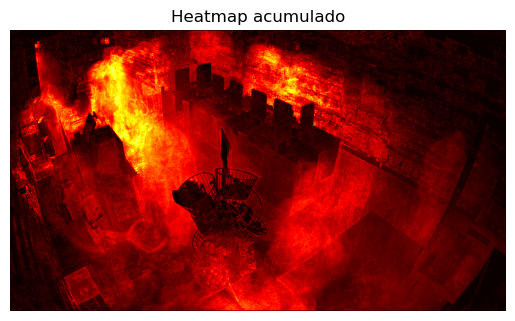

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Abrir video
cap = cv2.VideoCapture(video_path)

# Crear sustractor de fondo
bg_subtractor = cv2.createBackgroundSubtractorMOG2(
    history=500,          # Número de frames usados para construir el fondo.
    varThreshold=16,      # Sensibilidad para detectar cambios
    detectShadows=True,   # Detección de sombras
    )

heatmap_acumulado = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Inicializar acumulador si es la primera iteración -> Que tengan las mismas dimensiones (ancho y alto)
    if heatmap_acumulado is None:
        heatmap_acumulado = np.zeros_like(frame.shape[:2], dtype=np.float32)

    # Aplicar sustracción de fondo -> Las áreas en movimiento (objetos) se resaltan
    fgmask = bg_subtractor.apply(frame)

    # Acumular la máscara (convertida a float para evitar saturación)
    heatmap_acumulado = cv2.add(heatmap_acumulado, fgmask.astype(np.float32))

# Mostrar el mapa de calor
plt.imshow(heatmap_acumulado, cmap="hot")
plt.title("Heatmap acumulado")
plt.axis("off")
plt.show()

**Heatmap normalizado**

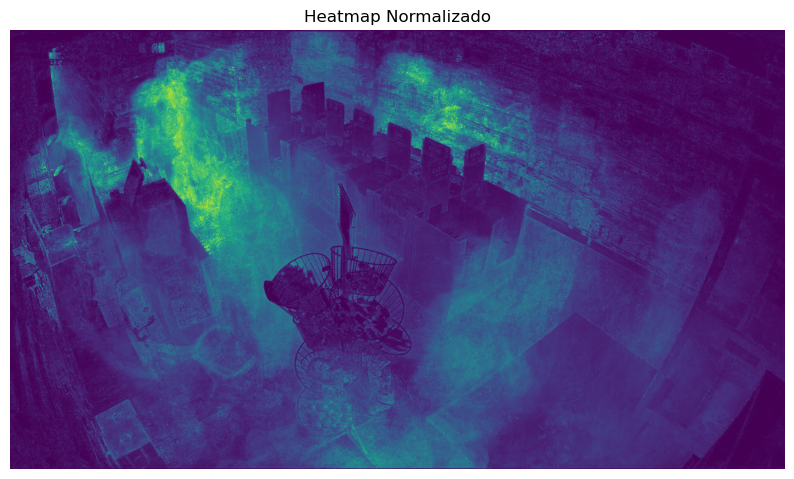

In [4]:
# Normalizar el heatmap a rango 0-255
heatmap_norm = cv2.normalize(heatmap_acumulado, None, 0, 255, cv2.NORM_MINMAX)
heatmap_norm = np.uint8(heatmap_norm)

# Aplicar un colormap (por ejemplo, COLORMAP_VIRIDIS)
colored_heatmap = cv2.applyColorMap(heatmap_norm, cv2.COLORMAP_VIRIDIS)

# Visualización con matplotlib
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(colored_heatmap, cv2.COLOR_BGR2RGB))
plt.title("Heatmap Normalizado")
plt.axis("off")
plt.show()
